<img src='https://raw.githubusercontent.com/betelgeus/study/master/images/statistic_workflow.png'/>

**Оглавление**
- Исследовать взаимосвязь между двумя переменными
    - Обе переменные количественные
        - Коэффициент корреляции Пирсона
        - Коэффициент корреляции Спирмена
        - Линейная регрессия
    - Обе переменные номинативные
        - Хи-квадрат Пирсона
        - F-тест (критерий Фишера)
    - Одна номинативная, вторая количественная
        - T-критерий Стьюдента
        - Логистическая регрессия
- Исследовать взаимосвязь между множеством переменных
    - Зависимая переменная количественная
        - Линейная регрессия
        - Дисперсионный анализ
        - Критерий Краскела-Уоллиса
    - Зависимая переменная номинативная
        - Логистическая регрессия
- Полезные функции
    - Pandas
        - Dataframe
        - Series
    - Numpy


### Коэффициент корреляции Пирсона (Pearsons correlation coefficient)

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('https://query.data.world/s/lh4kla5beh3vcgb75sgui2pqj4szqg', encoding='latin-1')
df.head()

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


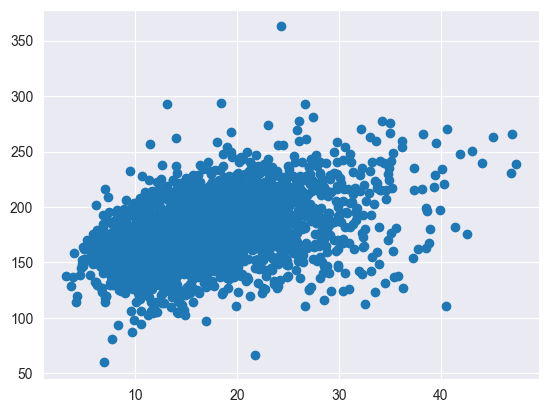

In [9]:
# Independent variable
x = df['povertyPercent']
# Dependent variable
y = df['TARGET_deathRate']

plt.scatter(x, y)
plt.show()

In [10]:
# Pearsons correlation coefficient
pcc = np.corrcoef(x, y)
pcc

array([[1.        , 0.42938898],
       [0.42938898, 1.        ]])

In [11]:
import scipy.stats as stats
# The Pearson correlation coefficient measures the linear relationship between two datasets. Like other correlation coefficients, this one varies between -1
# and +1 with 0 implying no correlation. Correlations of -1 or +1 imply an exact linear relationship. Positive correlations imply that as x increases,
# so does y. Negative correlations imply that as x increases, y decreases.
# This function also performs a test of the null hypothesis that the distributions underlying the samples are uncorrelated and normally distributed.
# The p-value roughly indicates the probability of an uncorrelated system producing datasets that have a Pearson correlation at least as extreme
# as the one computed from these datasets.

In [12]:
result = stats.pearsonr(x, y)
print('pearson', result[0])
print('p_value', result[1])

pearson 0.42938898025645067
p_value 5.902636717519498e-137


In [13]:
# More method's: https://realpython.com/numpy-scipy-pandas-correlation-python/

### Коэффициент корреляции Спирмена (Spearman's rank correlation coefficient)
More accurate for samples with significant outliers.

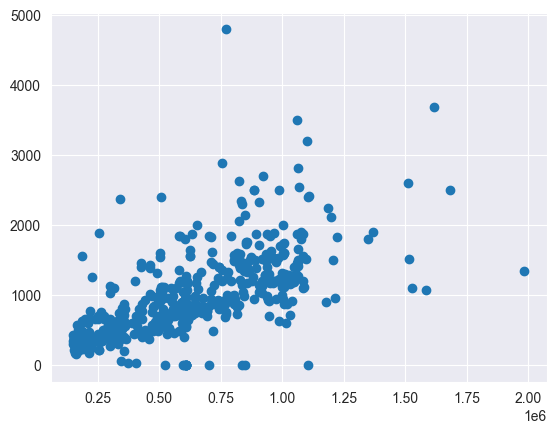

In [14]:
df = pd.read_csv('/Users/mitya/Desktop/query_result.csv')
# Independent variable
x = df['Distance']
# Dependent variable
y = df['Total']

plt.scatter(x, y)
plt.show()

In [15]:
result = stats.pearsonr(x, y)
print('pearson', result[0])
print('p_value', result[1])

pearson 0.6362423205982423
p_value 2.075582009883922e-57


In [16]:
result = stats.spearmanr(x, y)
print('spearman', result[0])
print('p_value', result[1])

spearman 0.7243458131338534
p_value 1.7150715266536816e-81


### Линейная регрессия (Linear regression)
**Usage Requirements**
- linear relationship X and Y
- normal distribution of residuals
- homoscedasticity - constant variability of residuals at all levels of the independent variable

In [17]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
from scipy.stats import linregress
from statsmodels.formula.api import ols

In [18]:
df = pd.read_csv('/Users/mitya/Desktop/query_result.csv')
# Independent variable
x = df['Distance']
# Dependent variable
y = df['Total']

In [19]:
# Linear relationship X and Y
result = stats.pearsonr(x, y)
print('pearson', result[0])
print('p_value', result[1])

pearson 0.6362423205982423
p_value 2.075582009883922e-57


In [20]:
# Создаем модель по методу наименьших квадратов (OLS — ordinary least squares)
# МНК (метод наименьших квадратов) - это способ нахождения оптимальных параметров линейной регрессии (b0, b1), таких, что сумма квадратов ошибок
# (остатков) была минимальная. Остаток — это разница между значением реальной точки на графике и значением, которое предсказывает регрессионная прямая.
# b0 - (intercept) значение точки пересечения линии с осью Y
# b1 - (slope) задаёт наклон и направление линии регрессии
# Синтаксис ols(формула, data=источник данных)

ols_model = ols('y ~ x', data=df).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     334.6
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           2.08e-57
Time:                        18:24:46   Log-Likelihood:                -3741.8
No. Observations:                 494   AIC:                             7488.
Df Residuals:                     492   BIC:                             7496.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    176.0133     48.908      3.599      0.000      79.920     272.107
x              0.0013   6.96e-05     18.293      0.000       0.001       0.001
==============================================================================
Omnibus:                      211.326   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1900.382
Skew:                           1.618   Prob(JB):                         0.00
Kurtosis:                      12.047   Cond. No.                     1.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Model predict values
model_fitted_y = ols_model.fittedvalues
df['Fitted Total'] = model_fitted_y
df.head(10)

,Distance,Total,Fitted Total
0,802591,1006,1197.244793
1,592503,600,929.924980
2,1005778,1600,1455.783647
3,615555,645,959.256766
4,615086,645,958.660002
5,646770,990,998.975303
6,646770,891,998.975303
7,301925,668,560.188219
8,375767,39,654.146130
9,932193,1293,1362.152747


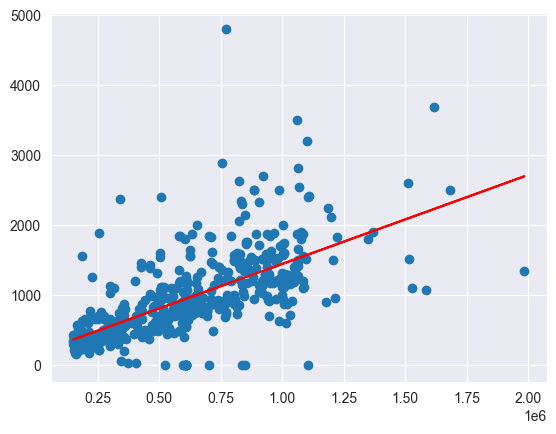

In [22]:
# Find relationship between two values
plt.scatter(x, y)
plt.plot(x, model_fitted_y, color='r')
plt.show()

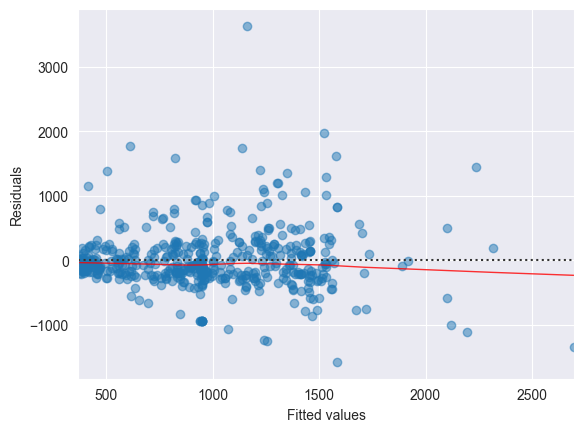

In [23]:
# Homoscedasticity
# Residuals vs Fitted Plot
plot = sns.residplot(x=model_fitted_y, y='Total', data=df, lowess=True, scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals')
plt.show()

In [24]:
# Normal distribution of residuals
df['Residuals'] = df['Total'] - df['Fitted Total']
df.head(10)

,Distance,Total,Fitted Total,Residuals
0,802591,1006,1197.244793,-191.244793
1,592503,600,929.924980,-329.924980
2,1005778,1600,1455.783647,144.216353
3,615555,645,959.256766,-314.256766
4,615086,645,958.660002,-313.660002
5,646770,990,998.975303,-8.975303
6,646770,891,998.975303,-107.975303
7,301925,668,560.188219,107.811781
8,375767,39,654.146130,-615.146130
9,932193,1293,1362.152747,-69.152747


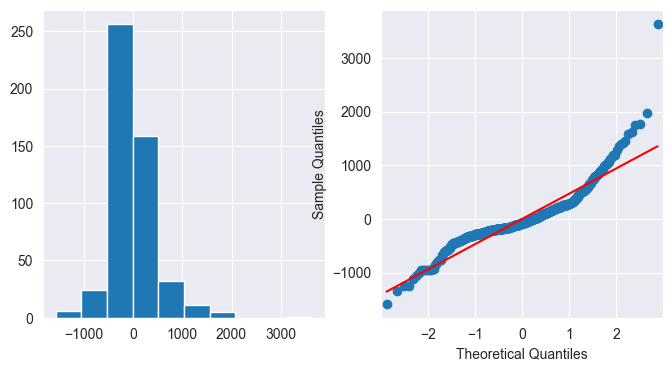

In [25]:
# Histogram of residuals and Normal Q-Q Plot of residuals
figure, axes = plt.subplots(1, 2, figsize=(8,4))
df['Residuals'].hist(ax=axes[0])
sm.qqplot(df['Residuals'], line='s', ax=axes[1])
plt.show()

In [26]:
# Summary data
df_describe = df.describe().transpose()
df_describe

,count,mean,std,min,25%,50%,75%,max
Distance,494.0,6.332683e+05,305808.620721,151466.000000,407039.250000,608282.000000,851339.000000,1.983208e+06
Total,494.0,9.817955e+02,611.585348,1.000000,559.250000,872.500000,1298.250000,4.800000e+03
Fitted Total,494.0,9.817955e+02,389.116481,368.741436,693.937513,950.002468,1259.272639,2.699483e+03
Residuals,494.0,-1.436044e-13,471.831540,-1580.768326,-218.335538,-80.519393,175.961774,3.639757e+03


In [27]:
# Find b0 и b1
slope, intercept, pearson_r, p_value, std_err =  linregress(df['Distance'], df['Total'])
print('intercept (b0)', intercept)
print('slope', slope)
print('pearson_r', pearson_r)
print('r_squared', pearson_r ** 2)
print('p_value', p_value)
print('std_err', std_err)

intercept (b0) 176.01332833006074
slope 0.0012724182856668129
pearson_r 0.6362423205982424
r_squared 0.40480429052023664
p_value 2.07558200988387e-57
std_err 6.955921828974808e-05


In [28]:
# intercept = b0 , x = b1
ols_model = ols('y ~ x', data=df).fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.405
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     334.6
Date:                Tue, 11 Oct 2022   Prob (F-statistic):           2.08e-57
Time:                        18:24:55   Log-Likelihood:                -3741.8
No. Observations:                 494   AIC:                             7488.
Df Residuals:                     492   BIC:                             7496.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    176.0133     48.908      3.599      0.000      79.920     272.107
x              0.0013   6.96e-05     18.293      0.000       0.001       0.001
==============================================================================
Omnibus:                      211.326   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1900.382
Skew:                           1.618   Prob(JB):                         0.00
Kurtosis:                      12.047   Cond. No.                     1.62e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.62e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Linear regression formula: y = 176 + 0.0013 * Distance

In [30]:
# H0: b1 = 0, no relationship between variables
# x P-value (P>|t|) < 0.05, intercept P-value (P>|t|) < 0.05, reject H0

In [31]:
# Find R-squared, what percentage of variance is explained by our model
# R-squared = 0.40480429052023664, 40% of variance is explained by our model (not much)

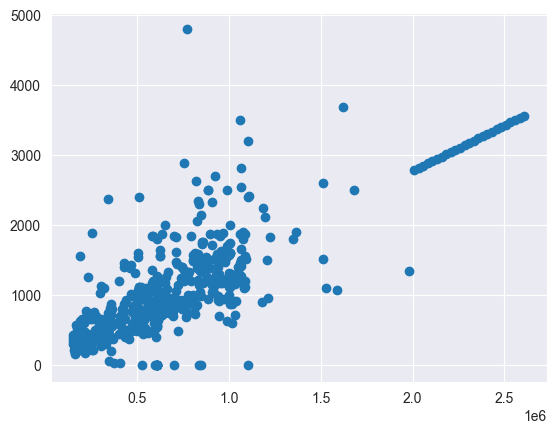

In [32]:
# Prediction
df = pd.read_csv('/Users/mitya/Desktop/query_result.csv')
df_predict = df
max_distance = df['Distance'].max()

for _ in range(25):
    max_distance += 25000
    fitted_total = 176 + 0.0013 * max_distance
    df_predict.loc[len(df_predict.index)] = [max_distance, fitted_total]

x = df_predict['Distance']
y = df_predict['Total']
plt.scatter(x, y)
plt.show()

### Хи-квадрат Пирсона (Chi-squared)
Для применения критерия Хи-квадрат Пирсона необходимо соблюдать следующие условия:
1. Измерение может быть проведено в любой шкале;
2. Желательно, чтобы общее количество наблюдений было более 20. С увеличением объема выборки
точность критерия повышается;
3. Теоретическая (ожидаемая) частота для каждого выборочного интервала (соответствующая нулевой
гипотезе) должна, быть более 5. Если ожидаемое явление принимает значение менее 5, то необходимо
использовать точный критерий Фишера;
4. Если теоретическая (ожидаемая) частота в случае использования четырехпольных таблиц (2х2) принимает
значение менее 10 (а именно 5<x<10), необходим расчет поправки Йетса;
5. Сравниваемые частоты должны быть примерно одного размера;
6. Сопоставляемые выборки должны быть случайными и независимыми (то есть испытуемые/наблюдения в
них должны быть разными, в отличие от связанных групп, в которых анализируются изменения «до-после» у одних и тех испытуемых. Для таких ситуаций существует отдельный тест МакНимара (McNemar) при сравнении двух связанных совокупностей или рассчитывается Q-критерий Кохрена в случае сравнения трех и более групп.

<a href="https://lit-review.ru/biostatistika/kriterijj-khi-kvadrat-pirsona/">Последовательность действий</a>

**Постановка задачи**
Таблица содержит номинативные переменные OverallCond (Общая оценка состояния жилья), SaleCondition (Оценка состояния продажи).
Необходимо оценить влияние первой переменной на вторую.
Описание таблицы: <a href="https://www.kaggle.com/competitions/home-data-for-ml-course/data?select=train.csv">www.kaggle.com/competitions/home-data-for-ml-course/<a/>

In [43]:
import pandas as pd
import statsmodels.api as sm
import scipy.stats

In [44]:
df = pd.read_csv('https://raw.githubusercontent.com/betelgeus/study/master/data/housing_prices.csv', usecols=['OverallCond', 'SaleCondition'])
df.head()

,OverallCond,SaleCondition
0,5,Normal
1,8,Normal
2,5,Normal
3,5,Abnorml
4,5,Normal


In [45]:
# Подготовим таблицу сопряженности, где SaleCondition будут строками, а OverallCond колонками
table = sm.stats.Table.from_data(df[['SaleCondition', 'OverallCond']])
contingency_table = table.table_orig
contingency_table
# Важно! Хи-квадрат Пирсона не поодходит для датасета т.к. есть экстремально низкие значения > 5

OverallCond,1,2,3,4,5,6,7,8,9
SaleCondition,,,,,,,,,
Abnorml,0,2,5,5,51,18,19,0,1
AdjLand,0,0,1,0,2,1,0,0,0
Alloca,0,0,1,1,7,1,2,0,0
Family,0,0,0,2,13,2,2,1,0
Normal,1,2,18,49,628,227,182,70,21
Partial,0,1,0,0,120,3,0,1,0


In [36]:
# H0: OverallCond никак не влияет на SaleCondition, распределение наблюдений не отличается от ожидаемого (p_value >= 0.05)
# Чем больше chi2, тем сильнее отклонения от ожидаемого значения

In [37]:
# Рассчитаем ожидаемые значения
fit_val_table = table.fittedvalues
fit_val_table

OverallCond,1,2,3,4,5,6,7,8,9
SaleCondition,,,,,,,,,
Abnorml,0.242775,0.450867,1.803468,4.023121,56.947977,17.479769,14.289017,5.098266,1.664740
AdjLand,0.016661,0.030942,0.123767,0.276097,3.908194,1.199592,0.980619,0.349881,0.114247
Alloca,0.033322,0.061884,0.247535,0.552193,7.816389,2.399184,1.961238,0.699762,0.228494
Family,0.052363,0.097246,0.388983,0.867732,12.282897,3.770146,3.081945,1.099626,0.359062
Normal,2.851411,5.295478,21.181911,47.251955,668.859572,205.301598,167.825910,59.879633,19.552533
Partial,0.303468,0.563584,2.254335,5.028902,71.184971,21.849711,17.861272,6.372832,2.080925


In [38]:
# Рассчитаем остатки
resid_table = table.resid_pearson
resid_table

OverallCond,1,2,3,4,5,6,7,8,9
SaleCondition,,,,,,,,,
Abnorml,0.522050,2.307089,2.380262,0.487034,-0.788189,0.124431,1.246265,-2.036493,-0.515203
AdjLand,3.744564,2.666573,2.490670,0.426118,-0.965238,-0.182233,-0.485345,0.253791,1.141267
Alloca,2.556535,1.761170,1.512405,0.602622,-0.292008,-0.903323,0.027679,-0.238802,0.567993
Family,1.956199,1.291530,0.178001,1.215504,0.204612,-0.911654,-0.616301,-0.095006,0.235204
Normal,-1.096410,-1.432075,-0.691362,0.254298,-1.579888,1.514369,1.094122,1.307846,0.327346
Partial,0.356760,0.581328,-1.168432,-2.019558,5.785746,-4.032569,-4.107952,-2.128321,-1.095931


In [39]:
chi2, df, p_value = table.test_nominal_association().statistic, table.test_nominal_association().df, table.test_nominal_association().pvalue
print('chi2', chi2)
print('p_value', p_value)
print('df', df)

chi2 159.92757089234053
p_value 3.3306690738754696e-16
df 40


In [40]:
# Рассчитаем критическое значение chi2 с уровнем статистической значимости α = 0.1% (обычно 5%)
critical_value = scipy.stats.chi2.ppf(1-.001, df=df)
critical_value

73.40195751899103

In [41]:
# Отклоняем H0, принимаем HA. Фактическое значение chi2 значительно превышает критическое значение chi2 при α = 0.1% и df=40
# Есть взаимосвязь между общей оценкой состояния жилья и оценкой состояния продажи

In [ ]:
chi2_table = table.chi2_contribs
chi2_table

In [ ]:
# Альтернативный способ решения задачи

In [54]:
from scipy.stats import chi2_contingency
# correction=True поправка Йетса

In [ ]:
chi2, p_val, dof, exp = chi2_contingency(contingency_table, correction=True)
print('chi2', chi2)
print('p_value', p_val)
print('df', dof)

### Постановка задачи
Провести исследование взаимосвязи двух номинативных переменных Cargo count и Passengers count

In [46]:
df = pd.read_csv('/Users/mitya/Desktop/cargo_passengers.csv')
df.head()

,Cargo count,Passengers count
0,0,0
1,2,2
2,2,2
3,0,0
4,1,1


In [47]:
table = sm.stats.Table.from_data(df[['Cargo count', 'Passengers count']])
contingency_table = table.table_orig
contingency_table
# Важно! Хи-квадрат Пирсона не поодходит для датасета т.к. есть экстремально низкие значения > 5

Passengers count,0,1,2,3
Cargo count,,,,
0,1555,11,23,4
1,146,538,9,1
2,273,43,1077,2
3,16,1,4,72
4,14,5,19,0


In [48]:
fit_val_table = table.fittedvalues
fit_val_table

Passengers count,0,1,2,3
Cargo count,,,,
0,837.123902,249.800446,472.866396,33.209257
1,364.698046,108.827062,206.007080,14.467812
2,733.074603,218.751803,414.092041,29.081552
3,48.871640,14.583454,27.606136,1.938770
4,20.231808,6.037236,11.428347,0.802609


In [49]:
resid_table = table.resid_pearson
resid_table

Passengers count,0,1,2,3
Cargo count,,,,
0,24.811592,-15.109098,-20.687801,-5.068634
1,-11.451917,41.139961,-13.725898,-3.540753
2,-16.992379,-11.882942,32.576528,-5.021862
3,-4.702111,-3.556968,-4.492852,50.316983
4,-1.385469,-0.422142,2.239747,-0.337777


In [52]:
chi2, df, p_value = table.test_nominal_association().statistic, table.test_nominal_association().df, table.test_nominal_association().pvalue
print('chi2', chi2)
print('p_value', p_value)
print('df', df)

chi2 7432.525215499285
p_value 0.0
df 12


In [55]:
chi2, p_val, dof, exp = chi2_contingency(contingency_table, correction=True)
print('chi2', chi2)
print('p_value', p_val)
print('df', dof)

chi2 7448.762084141021
p_value 0.0
df 12


In [56]:
critical_value = scipy.stats.chi2.ppf(1-.001, df=df)
critical_value

32.90949040736021

In [57]:
# Отклоняем H0. Фактическое значение chi2 значительно превышает критическое значение chi2 при α = 0.1% и df=32

### Постановка задачи
Провести исследование взаимосвязи двух номинативных переменных Passengers и Individual

In [58]:
df = pd.read_csv('/Users/mitya/Desktop/passengers_individual.csv')
df.head()

,Passengers,Individual calc
0,0,0
1,2,0
2,2,0
3,0,0
4,1,0


In [59]:
table = sm.stats.Table.from_data(df[['Individual calc', 'Passengers']])
contingency_table = table.table_orig
contingency_table

Passengers,0,1,2,3
Individual calc,,,,
0,1017,212,333,19
1,987,386,799,60


In [60]:
fit_val_table = table.fittedvalues
fit_val_table

Passengers,0,1,2,3
Individual calc,,,,
0,830.926829,247.95122,469.365854,32.756098
1,1173.073171,350.04878,662.634146,46.243902


In [61]:
chi2, df, p_value = table.test_nominal_association().statistic, table.test_nominal_association().df, table.test_nominal_association().pvalue
print('chi2', chi2)
print('p_value', p_value)
print('df', df)

chi2 157.6389950100305
p_value 0.0
df 3


In [62]:
chi2, p_val, dof, exp = chi2_contingency(contingency_table, correction=False)
print('chi2', chi2)
print('p_value', p_val)
print('df', dof)

chi2 157.63899501003044
p_value 5.924180789938196e-34
df 3


In [63]:
critical_value = scipy.stats.chi2.ppf(1-.001, df=df)
critical_value

16.26623619623813

In [64]:
# Отклоняем H0. Фактическое значение chi2 значительно превышает критическое значение chi2 при α = 0.1% и df=3

### F-тест (критерий Фишера)
Если ожидаемое явление принимает значение менее 5, то необходимо использовать точный критерий Фишера.

**Постановка задачи**
Определить существует ли статистически значимая связь между полом и предпочтениями политической партии

In [66]:
import pandas as pd
from scipy.stats import fisher_exact

In [71]:
df = pd.DataFrame([[8, 4], [4, 9]], columns=['Женщины', 'Мужчины'], index=['Демократ', 'Республиканец'])
df

,Женщины,Мужчины
Демократ,8,4
Республиканец,4,9


In [72]:
_, p_val = fisher_exact(df)
print('p_value', p_val)

p_value 0.11523854393015787


In [73]:
# Статистически значимой зависимости между полом и политическими предпочтениями не обнаружены